# AI Lab Assignment 4

# 3. Text processing and unbalanced data (4.5 points)

In [12]:
import pandas as pd

df = pd.read_csv("train.tsv", sep='\t', index_col="PhraseId")
pd.set_option('display.max_colwidth', None)
df.head(2)

,SentenceId,Phrase,Sentiment
PhraseId,,,
1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
2,1,A series of escapades demonstrating the adage that what is good for the goose,2


We will use a dataset to predict the sentiment of some text from tagged phrases.
Labels for sentiments are:

* 0 - negative
* 1 - somewhat negative
* 2 - neutral
* 3 - somewhat positive
* 4 - positive

More information [here](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews).


Throughout this exercise we will see different ways of processing the text and balancing the classes to be learned.

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df[["Phrase", "Sentiment"]], random_state=0)
X_train = train.Phrase
X_test = test.Phrase
y_train = train.Sentiment
y_test = test.Sentiment

**Basic Models**

We are going to start with a *pipe* of very basic models and see if they have any issues.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

count_vectorizer = CountVectorizer(max_features=1000)
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
pipe = make_pipeline(count_vectorizer,decision_tree)

In [15]:
from sklearn.metrics import accuracy_score

def get_accuracy(pipe):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return round(accuracy_score(y_pred, y_test),3)

In [16]:
get_accuracy(pipe)

0.515

Let's see which classes are actually being predicted

In [17]:
# Training labels
round(pd.Series(y_train).value_counts(normalize=True),2)

2    0.51
3    0.21
1    0.17
4    0.06
0    0.04
Name: Sentiment, dtype: float64

In [18]:
# Predicted classes
y_pred = pipe.predict(X_test)
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.97
3    0.03
dtype: float64

That is: being an unbalanced problem, the prediction is clearly biased towards one of the classes.

This can also be seen by analyzing the **confusion matrix**

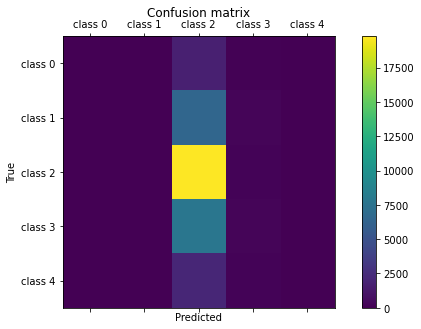

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(pipe):
    ticks = np.unique(y_test)
    labels = [('class '+ str(tick)) for tick in ticks]
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(pipe)

## Changing models and data processing

Analyze if any of the other models seen in previous exercises avoid this problem of unbalanced classes.

For example, in the following cell we changed the decision tree classifier and used a KNN instead.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline


knn = KNeighborsClassifier(n_neighbors=1)
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1000)
pipe = make_pipeline(count_vectorizer,decision_tree)
get_accuracy(pipe)


knn = KNeighborsClassifier(n_neighbors=10)
pipe_knn = make_pipeline(count_vectorizer,knn)
get_accuracy(pipe_knn)

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

gnb = GaussianNB()
pipe_gnb = Pipeline([
      ('vectorizer', count_vectorizer), 
      ('to_dense', DenseTransformer()), 
      ('classifier', gnb)
      ])
get_accuracy(pipe_gnb)


lr = LogisticRegression(C=1e10,solver='lbfgs')
pipe_lr = make_pipeline(count_vectorizer,lr)
get_accuracy(pipe_lr)

mlp = MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=1000,
                              alpha=0)

pipe_mlp = make_pipeline(count_vectorizer,mlp)
get_accuracy(pipe_mlp)



"\ndecision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1000)\npipe = make_pipeline(count_vectorizer,decision_tree)\nget_accuracy(pipe)\n\n\nknn = KNeighborsClassifier(n_neighbors=10)\npipe_knn = make_pipeline(count_vectorizer,knn)\nget_accuracy(pipe_knn)\n\nclass DenseTransformer(TransformerMixin):\n\n    def fit(self, X, y=None, **fit_params):\n        return self\n\n    def transform(self, X, y=None, **fit_params):\n        return X.todense()\n\ngnb = GaussianNB()\npipe_gnb = Pipeline([\n      ('vectorizer', count_vectorizer), \n      ('to_dense', DenseTransformer()), \n      ('classifier', gnb)\n      ])\nget_accuracy(pipe_gnb)\n\n\nlr = LogisticRegression(C=1e10,solver='lbfgs')\npipe_lr = make_pipeline(count_vectorizer,lr)\nget_accuracy(pipe_lr)\n\nmlp = MLPClassifier(hidden_layer_sizes=(50,),\n                              max_iter=1000,\n                              alpha=0)\n\npipe_mlp = make_pipeline(count_vectorizer,mlp)\nget_accuracy(pipe_mlp)\n"

In [21]:
plot_confusion_matrix(pipe_mlp)

NameError: ignored

### Explore multiple models and reply to the following questions:

We performed a series of tests whith different models and this was the result:

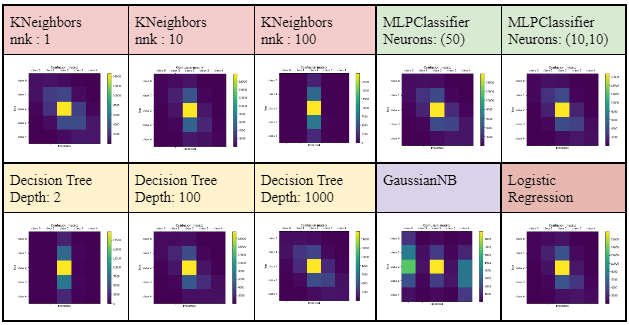

* Which model gives better results?

According to the experiments performed the greatest effect on the results is made by the kneighbors classifier with only one neighbor. This could happen because data processed doesn’t have much “noise” with values different from the neighbor classes. It should be noted that the results from the MLP classifier are also very good.

* Are there any parameters of the models that are particularly effective in avoiding imbalance?

As we can see, the depth parameter in the tree model is particularly effective in avoiding imbalance. The more depth the tree has, the more balance the predictions have. On the other hand we can observe that an excessive amount of neighbors in the KNeighbors model causes imbalance.

Note: include as many cells as you need to show the code you used to answer these questions.

### Data Processing

The first step used in the *pipe* above is very simple: it counts how many times each term appears. Also, it has been limited to a maximum of 1000 dimensions. Try other ways of processing the text and discuss the differences. 

As an example, the following cell uses a method that considers the frequency of terms ([TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) ). The documentation shows that it allows several configurations (removing accents, changing to lowercase, performing more complex transformations, removing common words, etc.).

0.606


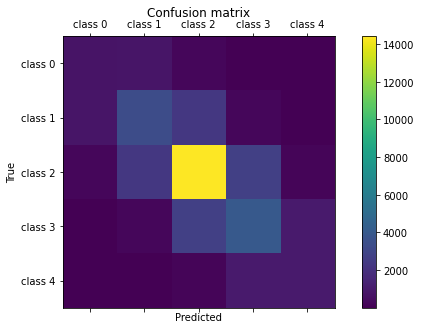

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3))
pipe_tfidf = make_pipeline(tfidf_vectorizer, knn)
print(get_accuracy(pipe_tfidf))
plot_confusion_matrix(pipe_tfidf)

Try various classifiers and settings for text processing and answer the following questions:

* According to your experiments, which processing step has the greatest effect on the results: the classifier or the text processing?

According to our experiments, the processing step that has the greatest results is the text processing. Processing the data depending on the specific context of the sample is more important than choosing the classifier.

* Have you found any type of processing that always improves the results? What hypothesis would you propose to explain this behavior?

A type of processing that always improves the results in this scenario is Tfidf. Our hypothesis about these results is that this text processing is usually used for the same objective we are looking for, classify depending on behavior. The importance resides in the way Tfidf measures not only the amount of words but the importance of each word. Tfidf also have multiple parameters that could be modified to adapt better to the data and improve the output.

0.6


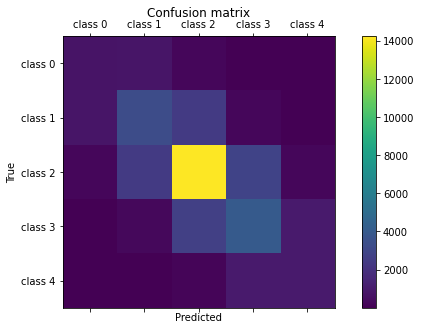

In [29]:
# include code about this section here
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3))
pipe_tfidf = make_pipeline(tfidf_vectorizer, knn)
print(get_accuracy(pipe_tfidf))
plot_confusion_matrix(pipe_tfidf)

from sklearn.feature_extraction import DictVectorizer
dict_vec = DictVectorizer()
pipe_dic = make_pipeline(dict_vec, knn)
print(get_accuracy(pipe_dic))
plot_confusion_matrix(pipe_dic)

from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_features=10000)
pipe_co = make_pipeline(count_vec, knn)
print(get_accuracy(pipe_co))
plot_confusion_matrix(pipe_co)

from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=10)
pipe_hv = make_pipeline(hv, knn)
print(get_accuracy(pipe_hv))
plot_confusion_matrix(pipe_hv)

After executing these models we obtaines the following to be able to answer the questions:

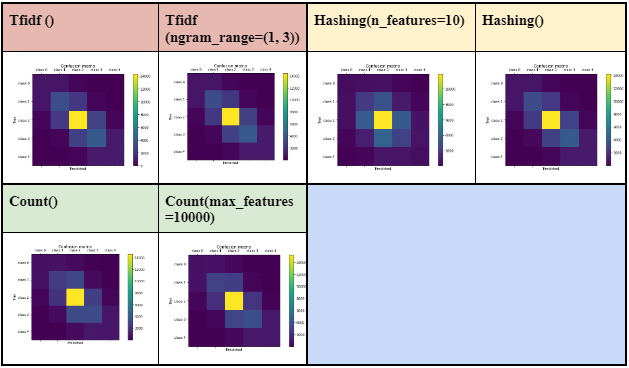